# Import libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
import numpy as np
import datetime as dt

# Get unit 4 data in as 'data'

In [2]:
data = pd.read_csv('unit4.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90569 entries, 0 to 90568
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STATE     90569 non-null  object 
 1   PVASTATE  90569 non-null  object 
 2   DOB       90569 non-null  int64  
 3   MDMAUD    90569 non-null  object 
 4   RECP3     90569 non-null  object 
 5   GENDER    90569 non-null  object 
 6   DOMAIN    90569 non-null  object 
 7   INCOME    70386 non-null  float64
 8   HOMEOWNR  90569 non-null  object 
 9   HV1       90569 non-null  int64  
 10  HV2       90569 non-null  int64  
 11  HV3       90569 non-null  int64  
 12  HV4       90569 non-null  int64  
 13  IC1       90569 non-null  int64  
 14  IC2       90569 non-null  int64  
 15  IC3       90569 non-null  int64  
 16  IC4       90569 non-null  int64  
 17  IC5       90569 non-null  int64  
 18  VETERANS  90569 non-null  object 
 19  NUMPROM   90569 non-null  int64  
 20  CARDPROM  90569 non-null  in

In [4]:
data.head()

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,...,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,,3712,XXXX,,F,T2,NaN,,479,...,,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,,5202,XXXX,,M,S1,6.0,H,5468,...,,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,,0,XXXX,,M,R2,3.0,U,497,...,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,...,,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,,2001,XXXX,X,F,S2,3.0,H,576,...,,113,43,10,25,9702,L2F,37,14.0,6.864865


# Data quality check

## Duplicates

In [5]:
data.duplicated().sum() # check number of duplicates

1

In [6]:
data[data.duplicated(keep=False)] #see duplicates

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,...,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
36109,CA,,4801,XXXX,,F,U1,NaN,,3365,...,,13,5,3,8,9702,L1F,1,NaN,15.0
49464,CA,,4801,XXXX,,F,U1,NaN,,3365,...,,13,5,3,8,9702,L1F,1,NaN,15.0


In [7]:
data.drop_duplicates(inplace=True, keep='first')

## Deal with other drops

In [8]:
# drop nulls or any obvious column?

## Reset index

In [9]:
data.info() # we can see that the index is not +1 than the 0 to 90568. This is because we droped a line. We should reset it

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90568 entries, 0 to 90568
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STATE     90568 non-null  object 
 1   PVASTATE  90568 non-null  object 
 2   DOB       90568 non-null  int64  
 3   MDMAUD    90568 non-null  object 
 4   RECP3     90568 non-null  object 
 5   GENDER    90568 non-null  object 
 6   DOMAIN    90568 non-null  object 
 7   INCOME    70386 non-null  float64
 8   HOMEOWNR  90568 non-null  object 
 9   HV1       90568 non-null  int64  
 10  HV2       90568 non-null  int64  
 11  HV3       90568 non-null  int64  
 12  HV4       90568 non-null  int64  
 13  IC1       90568 non-null  int64  
 14  IC2       90568 non-null  int64  
 15  IC3       90568 non-null  int64  
 16  IC4       90568 non-null  int64  
 17  IC5       90568 non-null  int64  
 18  VETERANS  90568 non-null  object 
 19  NUMPROM   90568 non-null  int64  
 20  CARDPROM  90568 non-null  in

In [10]:
data.reset_index(drop=True,inplace=True)

In [11]:
pd.set_option('display.max_columns', None) # To see all the columns (normally we only see the beginning and end of the table)

In [12]:
data.head()

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,,3712,XXXX,,F,T2,NaN,,479,635,3,2,307,318,349,378,12883,,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,,5202,XXXX,,M,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,,0,XXXX,,M,R2,3.0,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,,2001,XXXX,X,F,S2,3.0,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,9702,L2F,37,14.0,6.864865


# Split the data into numericals and categoricals for EDA

In [13]:
d_num=data.select_dtypes(np.number)
d_cat=data.select_dtypes(object)

# Numeric columns handling

In [14]:
d_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90568 entries, 0 to 90567
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DOB       90568 non-null  int64  
 1   INCOME    70386 non-null  float64
 2   HV1       90568 non-null  int64  
 3   HV2       90568 non-null  int64  
 4   HV3       90568 non-null  int64  
 5   HV4       90568 non-null  int64  
 6   IC1       90568 non-null  int64  
 7   IC2       90568 non-null  int64  
 8   IC3       90568 non-null  int64  
 9   IC4       90568 non-null  int64  
 10  IC5       90568 non-null  int64  
 11  NUMPROM   90568 non-null  int64  
 12  CARDPROM  90568 non-null  int64  
 13  CARDPM12  90568 non-null  int64  
 14  NUMPRM12  90568 non-null  int64  
 15  MAXADATE  90568 non-null  int64  
 16  NGIFTALL  90568 non-null  int64  
 17  TIMELAG   80916 non-null  float64
 18  AVGGIFT   90568 non-null  float64
dtypes: float64(3), int64(16)
memory usage: 13.1 MB


In [15]:
d_num.describe()

,DOB,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,NGIFTALL,TIMELAG,AVGGIFT
count,90568.000000,70386.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,80916.000000,90568.000000
mean,2724.419861,3.878257,1056.365814,1127.396586,4.213387,3.865383,339.368044,386.225897,386.688941,429.972684,15681.854474,46.797578,18.370848,5.343433,12.837404,9701.640602,9.501446,8.114378,13.428568
std,2136.454475,1.855265,936.357737,942.138836,2.302247,2.239625,162.383738,173.076543,160.938606,171.325839,8508.737296,22.944818,8.582028,1.207107,4.499929,5.679915,8.495065,8.310877,10.796408
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,9611.000000,1.000000,0.000000,1.285714
25%,112.000000,2.000000,511.000000,553.000000,3.000000,2.000000,230.000000,273.000000,277.000000,314.000000,10770.000000,27.000000,11.000000,5.000000,11.000000,9702.000000,3.000000,4.000000,8.454545
50%,2610.000000,4.000000,735.000000,800.000000,4.000000,3.000000,309.000000,355.000000,353.000000,396.000000,13692.000000,46.000000,18.000000,6.000000,12.000000,9702.000000,7.000000,6.000000,11.666667
75%,4601.000000,5.000000,1206.000000,1320.000000,5.000000,5.000000,414.000000,464.000000,465.000000,513.000000,18128.000000,64.000000,25.000000,6.000000,13.000000,9702.000000,13.000000,11.000000,15.625000
max,9710.000000,7.000000,6000.000000,6000.000000,13.000000,13.000000,1500.000000,1500.000000,1500.000000,1500.000000,159306.000000,195.000000,61.000000,19.000000,78.000000,9702.000000,237.000000,1088.000000,1000.000000


## Create a nulls df which summarises % of nulls per column

In [16]:
nulls=pd.DataFrame(d_num.isna().sum()/len(d_num)) # percentage of nulls in numerical columns

In [17]:
nulls.reset_index(inplace=True) # create an index for the nulls df

In [18]:
nulls.columns=['column_name','percentage_nulls'] # define column names
nulls.sort_values(by='percentage_nulls', ascending=False) #sort the values
#This is our data quality snapshot

,column_name,percentage_nulls
1,INCOME,0.222838
17,TIMELAG,0.106572
0,DOB,0.000000
10,IC5,0.000000
16,NGIFTALL,0.000000
15,MAXADATE,0.000000
14,NUMPRM12,0.000000
13,CARDPM12,0.000000
12,CARDPROM,0.000000
11,NUMPROM,0.000000


## Choose method to deal with nulls

In [19]:
d_num['INCOME'].unique()

array([nan,  6.,  3.,  1.,  4.,  2.,  7.,  5.])

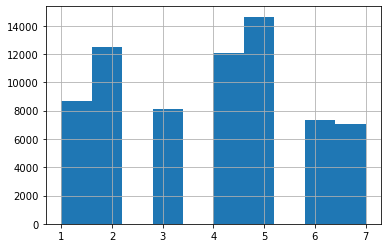

In [20]:
d_num['INCOME'].hist();

In [21]:
# We have different ways of dealing with nulls. 
# One option may be to replace them with the median, mode or mean or by other value we may think it's appropiate.
# But the most smart way would be to apply machine learning to predict the null values as we have the information of the rest of the columns.
# A worse option would be to remove rows and the worst to remove a whole column.
# The most important thing is to understand data: for example if a column of income has nulls it may be logic to substitute them by 0 (depending on the process to obtain the data)

In [22]:
d_num['INCOME'].median()

4.0

In [23]:
d_num['INCOME'].mean()

3.8782570397522234

In [24]:
d_num['INCOME'].mode()

0    5.0
Name: INCOME, dtype: float64

In [25]:
median_d=d_num['INCOME'].fillna(d_num['INCOME'].median())

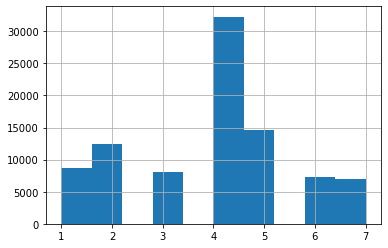

In [26]:
median_d.hist();

In [27]:
zero_d=d_num['INCOME'].fillna(0)

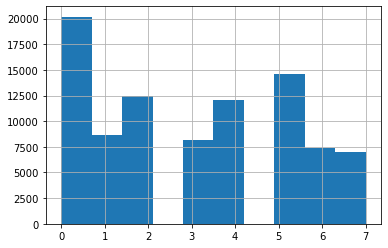

In [28]:
zero_d.hist();

## Apply chosen method to the data frame

In [29]:
d_num['INCOME']=d_num['INCOME'].fillna(0)

In [30]:
import warnings
warnings.filterwarnings('ignore')

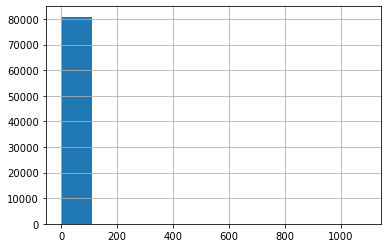

In [31]:
d_num['TIMELAG'].hist(); # we cannot see the distribution, we can check data to see what happens

In [32]:
d_num['TIMELAG'].value_counts() #last value looks as wrong data, we can filter (remove outliers) it to see if then we can have an idea of the distribution and decide how to deal with nulls

5.0       8106
4.0       8042
3.0       7995
6.0       6257
2.0       5900
          ... 
61.0         1
55.0         1
58.0         1
62.0         1
1088.0       1
Name: TIMELAG, Length: 67, dtype: int64

In [33]:
d_num.describe()

,DOB,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,NGIFTALL,TIMELAG,AVGGIFT
count,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,80916.000000,90568.000000
mean,2724.419861,3.014034,1056.365814,1127.396586,4.213387,3.865383,339.368044,386.225897,386.688941,429.972684,15681.854474,46.797578,18.370848,5.343433,12.837404,9701.640602,9.501446,8.114378,13.428568
std,2136.454475,2.297785,936.357737,942.138836,2.302247,2.239625,162.383738,173.076543,160.938606,171.325839,8508.737296,22.944818,8.582028,1.207107,4.499929,5.679915,8.495065,8.310877,10.796408
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,9611.000000,1.000000,0.000000,1.285714
25%,112.000000,1.000000,511.000000,553.000000,3.000000,2.000000,230.000000,273.000000,277.000000,314.000000,10770.000000,27.000000,11.000000,5.000000,11.000000,9702.000000,3.000000,4.000000,8.454545
50%,2610.000000,3.000000,735.000000,800.000000,4.000000,3.000000,309.000000,355.000000,353.000000,396.000000,13692.000000,46.000000,18.000000,6.000000,12.000000,9702.000000,7.000000,6.000000,11.666667
75%,4601.000000,5.000000,1206.000000,1320.000000,5.000000,5.000000,414.000000,464.000000,465.000000,513.000000,18128.000000,64.000000,25.000000,6.000000,13.000000,9702.000000,13.000000,11.000000,15.625000
max,9710.000000,7.000000,6000.000000,6000.000000,13.000000,13.000000,1500.000000,1500.000000,1500.000000,1500.000000,159306.000000,195.000000,61.000000,19.000000,78.000000,9702.000000,237.000000,1088.000000,1000.000000


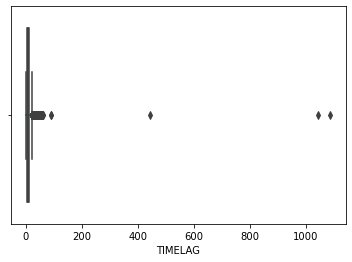

In [34]:
sns.boxplot(d_num['TIMELAG']); # Here we can see the outliers

In [35]:
# Removing outliers then scatter plot again
#- IQR (interquile ranges)
#- upper limit
#- exclude anything over upper limit
#OR filter by a fixed limit

In [36]:
# pd.cut or pd.qcut (first one defines limits as numbers and second one by quantiles)
# OR create function to bucket (if number is between 1-10 then...-a function that classifies)

In [37]:
# Example of setting an upper limit:
#timelag=d_num['TIMELAG']
#timelag=timelag[timelag<80]
#timelag.hist(bins=10);

# Now we can decide the best approach to deal with nulls

## Correlation
- correlation matrix (with or without mask, consider colors)
- joint plot
- pair plot
- scatter plot
- box plot

# Common things to check in the categorical columns

- blanks and nulls and any other weird values
- establish relevance - from the categories to the target (correlation)
    - chi squared test
- cardinality (how many difference values are in a column, are there some small which can be grouped?): if there are values that are really a minority we can think about grouping them, otherwise, when applying dummies to run the regression model we are creating a lot of noise
    

In [38]:
d_cat['MDMAUD'].unique() #see the different values we have in a column

array(['XXXX', 'C1CM', 'D1CM', 'L1CM', 'C2CM', 'D2CM', 'I1CM', 'I2MM',
       'I1LM', 'L2CM', 'C1MM', 'C1LM', 'D5CM', 'I2CM', 'D5TM', 'L1LM',
       'D5MM', 'C2MM', 'I5CM', 'C5CM', 'I5MM', 'C2LM', 'C5MM', 'D2MM',
       'L1MM', 'C5TM', 'L2TM'], dtype=object)

In [39]:
d_cat['MDMAUD'].value_counts() #check if there is a predominant value
# we see that almost all are XXXX, that may be that they are not major donors, we can transform the column to a yes-no

XXXX    90289
C1CM       59
L1CM       44
I1CM       34
D2CM       27
C2CM       23
D1CM       19
L2CM       14
C1LM        8
L1LM        8
I2CM        7
D5CM        5
D5MM        5
D2MM        4
I1LM        3
D5TM        3
C2MM        3
C5CM        3
C2LM        2
C1MM        1
I2MM        1
I5CM        1
I5MM        1
C5MM        1
L1MM        1
C5TM        1
L2TM        1
Name: MDMAUD, dtype: int64

In [40]:
major = data[(data.MDMAUD != 'XXXX')] #we exclude values XXXX, we are looking at major donors only

In [41]:
major.describe() #we check the new statitistical values and see how they evolve, for example income has increased so they may be related (we need to check it)

,DOB,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,NGIFTALL,TIMELAG,AVGGIFT
count,279.000000,211.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,277.000000,279.000000
mean,2284.824373,4.620853,1560.057348,1659.580645,5.243728,4.799283,419.763441,475.767025,470.770609,522.548387,20949.831541,89.534050,24.068100,6.146953,28.351254,9701.673835,15.236559,8.083032,76.561089
std,1830.291615,1.990057,1308.499175,1301.707619,2.790932,2.623058,234.541067,254.266245,218.951568,231.667766,13169.703884,30.273776,8.152703,1.230568,7.382065,5.448027,16.941328,7.267929,81.977787
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,6.000000,1.000000,6.000000,9611.000000,1.000000,0.000000,8.904762
25%,653.500000,3.000000,677.500000,717.000000,3.000000,3.000000,258.500000,300.500000,314.500000,358.500000,13060.500000,68.000000,18.000000,6.000000,25.000000,9702.000000,7.000000,4.000000,42.635088
50%,2201.000000,5.000000,1125.000000,1235.000000,5.000000,4.000000,358.000000,426.000000,426.000000,487.000000,17408.000000,94.000000,25.000000,6.000000,29.000000,9702.000000,11.000000,6.000000,61.111111
75%,3651.500000,6.000000,1929.500000,2144.500000,6.000000,6.000000,513.000000,558.000000,572.500000,618.000000,24688.000000,113.000000,30.000000,6.000000,33.000000,9702.000000,19.000000,10.000000,87.875000
max,6604.000000,7.000000,5916.000000,5800.000000,13.000000,13.000000,1287.000000,1500.000000,1130.000000,1246.000000,88847.000000,158.000000,41.000000,12.000000,50.000000,9702.000000,237.000000,40.000000,948.500000


In [42]:
data['AVGGIFT'].mean() #the avggift has also increased a lot, and it is our target (in the last table is way higher than the one we had before, we should also check the correlation)

13.428568110050856

In [43]:
#conclusion: replace value MDMAUD with major donor
# we create a function and we apply it to the column

def grp_mdmaud(x):
    if x == 'XXXX':
        return 'not_major_donor'
    else:
        return 'major_donor'
d_cat['MDMAUD']=list(map(grp_mdmaud,d_cat['MDMAUD']))

In [44]:
grp_mdmaud('XXXX')

'not_major_donor'

In [45]:
d_cat['STATE'].unique()

array(['IL', 'CA', 'NC', 'FL', 'AL', 'IN', 'LA', 'IA', 'TN', 'KS', 'MN',
       'UT', 'MI', 'MO', 'TX', 'OR', 'WA', 'WI', 'GA', 'OK', 'SC', 'KY',
       'MD', 'SD', 'NV', 'NE', 'AZ', 'ND', 'AK', 'AR', 'NM', 'MT', 'MS',
       'AP', 'CO', 'AA', 'HI', 'ME', 'WY', 'ID', 'OH', 'VA', 'NJ', 'MA',
       'VT', 'NY', 'PA', 'DC', 'AE', 'CT', 'DE', 'WV', 'RI', 'GU', 'AS',
       'NH', 'VI'], dtype=object)

In [46]:
d_cat['STATE'].value_counts()

CA    16283
FL     7959
TX     7166
IL     6124
MI     5375
NC     3956
WA     3383
GA     3261
IN     2855
WI     2656
MO     2583
TN     2396
AZ     2278
MN     2081
OR     2045
CO     1929
SC     1660
AL     1627
OK     1553
KY     1542
LA     1533
KS     1233
IA     1214
AR      969
MS      948
NV      923
NM      824
NE      715
UT      546
ID      504
MT      498
HI      423
SD      278
AK      275
WY      267
ND      241
AP       78
NY       70
VA       54
OH       52
PA       36
MD       30
MA       25
NJ       24
CT       20
AA       15
AE       14
ME       11
NH        8
RI        6
VT        6
VI        5
WV        3
GU        3
DE        3
AS        1
DC        1
Name: STATE, dtype: int64

In [47]:
# we need to understand if state is impacting avggift to check the relevance of the column
# to do that we can do: box plot, cat plot with jitter, map (in tableau or in python, bar plot
# groupby state with mean, median (to check if the mean/median of a state is bigger than the others)

In [48]:
#mapping in Python (highly computer resource consuming):
#import pandas as pd 

#df_plot=data[['STATE','AVGGIFT']]

In [49]:
#import plotly.express as px
#fig = px.choropleth(df_plot,
 #                   locations='STATE', 
  #                  locationmode="USA-states", 
   #                 scope="usa",
    #                color='AVGGIFT',
     #               color_continuous_scale="Viridis_r", 
      #              
       #             )
#fig.show()

In [50]:
import seaborn as sns

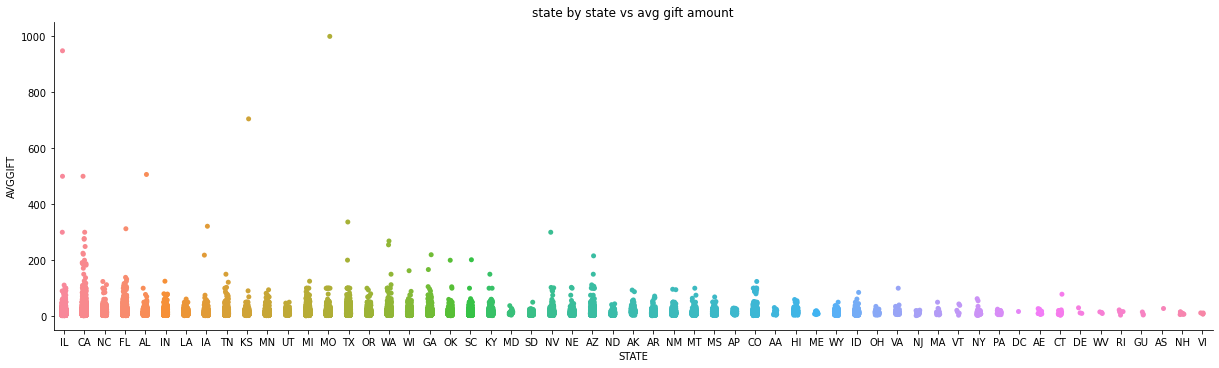

In [52]:
ax=sns.catplot(data=data,x='STATE', y='AVGGIFT').set(title='state by state vs avg gift amount')
ax.fig.set_figwidth(20)
# The avg is more or less the same but we can see more dispersion in some states like California (may be interesting to analyze)

## Chi squared test
We use it to check correlation between categorical columns.
- Looking for correlation between categories
- Create a crosstab between columns 
- Run the test
- Evaluate the results

In [54]:
from scipy.stats import chi2_contingency

In [55]:
d_cat.columns

Index(['STATE', 'PVASTATE', 'MDMAUD', 'RECP3', 'GENDER', 'DOMAIN', 'HOMEOWNR',
       'VETERANS', 'RFA_2'],
      dtype='object')

In [56]:
data_crosstab=pd.crosstab(d_cat['HOMEOWNR'],d_cat['RFA_2'], margins=False)
# in a real exercise we would only perform this if the target variable was categorical, this is only an example

In [57]:
data_crosstab

RFA_2,L1E,L1F,L1G,L2E,L2F,L2G,L3D,L3E,L3F,L3G,L4D,L4E,L4F,L4G
HOMEOWNR,,,,,,,,,,,,,,
,1009,6727,2882,1010,2351,1087,508,1615,759,354,1079,894,534,241
H,2522,16179,6771,2596,5800,2413,1184,3970,1838,776,2276,1901,980,440
U,1136,6300,2354,1075,2247,910,575,1659,755,295,1094,852,437,183


In [59]:
chi2_contingency(data_crosstab, correction=False)
# The low p-value means that the null hypothesis is not correct, so there is correlation between the 2 variables

(175.3605988661588,
 4.1538789000941835e-24,
 26,
 array([[ 1084.71369579,  6788.11831994,  2790.6915246 ,  1087.96760445,
          2416.72445014,  1024.98122957,   526.90078173,  1683.66531225,
           779.07870329,   331.20141772,  1034.04568943,   847.64320731,
           453.45541472,   200.81264906],
        [ 2558.27535112, 16009.6400053 ,  6581.78961664,  2565.94962901,
          5699.79582192,  2417.39753555,  1242.68485558,  3970.8906457 ,
          1837.4413921 ,   781.13185673,  2438.77588111,  1999.14939051,
          1069.46544033,   473.61257839],
        [ 1024.0109531 ,  6408.24167476,  2634.51885876,  1027.08276654,
          2281.47972794,   967.62123487,   497.41436269,  1589.44404205,
           735.4799046 ,   312.66672555,   976.17842947,   800.20740217,
           428.07914495,   189.57477255]]))

We have obtained:
- chi-square statistic (we should compare this value to the value obtained in the table for the degrees of freedom and confidence). If the value is higher than the max it indicates a lot of correlation.
- p-value (the p-value is the probability of obtaining results at least as extreme as the observed results of a statistical hypothesis test, assuming that the null hypothesis is correct)
- degrees of freedom (num columns - 1)*(num rows -1): we remove the 1s diagonal of a correlation matrix
- expected frequencies matrix (we don't need it)

We need to check a Chi-square probability table.

How confident we are that there is some correlation between the 2 variables.